## Imports

In [5]:
%load_ext autoreload
%autoreload 2
import util
import engutil
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Spectrum plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Sampling frequency: 96000
Detected Fundamental: 20.00 Hz


c:\Users\aske-\Documents\DTU\Kandidat\3. semester\Non linear transducers\non-linear-transducers-project\util.py:411: RuntimeWarning: divide by zero encountered in log10
  Sd = r**2 * np.pi


THD in velocity is 1.880 %
THD in SPL is 9.196 %


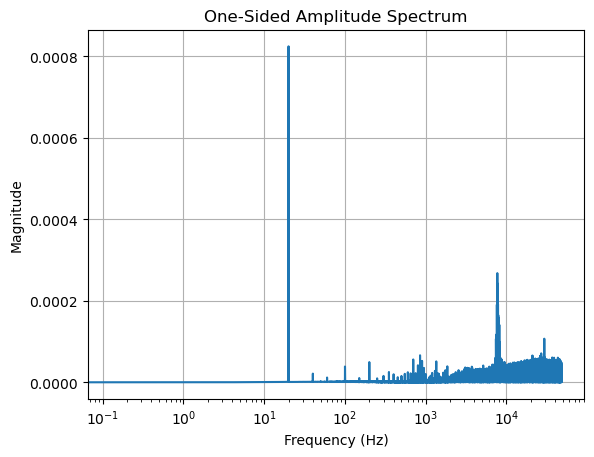

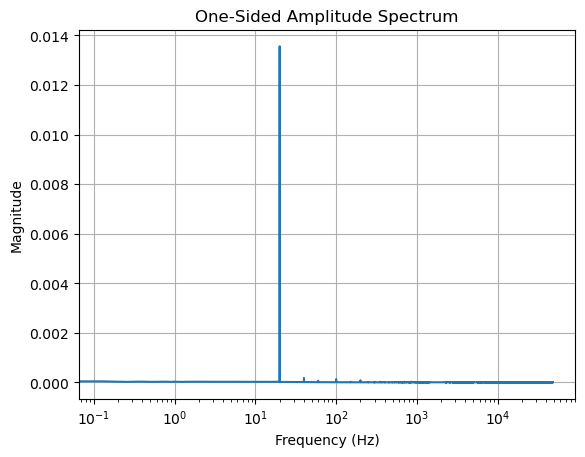

{1: 0.0008261178816614998, 2: 2.023111193219977e-05, 3: 1.1432548495520562e-05, 4: 1.0043798908761914e-06, 5: 4.9719711240374914e-05, 6: 1.390796009437038e-06, 7: 1.3307961613857763e-06, 8: 9.310261231213552e-07, 9: 5.780588410192165e-07, 10: 4.8405721030703515e-05, 11: 8.065399500282062e-07, 12: 9.372736598279912e-07, 13: 1.021626005655972e-06, 14: 1.0763930133878642e-06, 15: 2.1177434469081227e-05, 16: 8.396851439840764e-07, 17: 7.901353300847385e-07, 18: 1.7839516593557071e-06, 19: 1.7958142460883195e-06}
{1: 0.013582721533371188, 2: 0.00016631619154209808, 3: 6.265656353994177e-05, 4: 4.128409720429862e-06, 5: 0.00016349458291337475, 6: 3.8111580532780117e-06, 7: 3.1257790338291917e-06, 8: 1.9149440050975675e-06, 9: 1.0545606073541154e-06, 10: 7.953716712141462e-05, 11: 1.2062152128893601e-06, 12: 1.2835234402833958e-06, 13: 1.2927132703769421e-06, 14: 1.2641179810379225e-06, 15: 2.320309635282107e-05, 16: 8.625249131498583e-07, 17: 7.641829332433915e-07, 18: 1.6289380972713777e-06

In [ ]:
%load_ext autoreload
%autoreload 2
import util
path = "/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/puretone_f1_20Hz_f2_NoneHz_/puretone_f1_20Hz_f2_NoneHz_"

data = io.loadmat(path + "/puretone_f1_20Hz_f2_NoneHz_0.15Vrms.mat")

# path = "/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/puretone_f1_40Hz_f2_NoneHz_/puretone_f1_40Hz_f2_NoneHz_"

# data = io.loadmat(path + "/puretone_f1_40Hz_f2_NoneHz_0.15Vrms.mat")

fs = data['sample_rate'][0][0]

print(f"Sampling frequency: {fs}")

u = np.squeeze(data['voltage'])
i = np.squeeze(data['current'])
d = np.squeeze(data['displacement'])
v = np.squeeze(data['velocity'])

t = np.linspace(0, 8, 8*fs)

THD_vel, THD_data_vel = util.thd_r(v, fs)
THD_spl, THD_data_spl = util.thd_spl(v, fs, radius=4e-2)

print(f"THD in velocity is {THD_vel * 100:.3f} %")
print(f"THD in SPL is {THD_spl * 100:.3f} %")

util.plot_spectrum_in_spl(v, fs, radius=4e-2, log=False)
util.plot_spectrum(v,fs)

# plt.figure()
# plt.plot(t, v)
# plt.xlim([2,2 + 3*1/40])

print(THD_data_spl)
print(THD_data_vel)


In [94]:
path = "C:/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/Gruppe 2 - lab c og d/Gruppe 2 - lab c og d"

radius = 4e-2

def thd_spl_puretone(path, file_name, radius):
    data = io.loadmat(path + file_name)
    fs = data['sample_rate'][0][0]
    u = np.squeeze(data['voltage'])
    i = np.squeeze(data['current'])
    d = np.squeeze(data['displacement'])
    v = np.squeeze(data['velocity'])

    THD_spl, THD_data_spl = util.thd_spl(v, fs, radius=radius)
    return THD_spl

test_freq = np.array([20, 40, 80])
test_rms = np.array([0.15, 1.2, 2.4, 5])
thds = np.zeros((len(test_freq), len(test_rms)))

for i in range(len(test_freq)):
    for k in range(len(test_rms)):
        file_name = "/puretone_f1_" + str(test_freq[i]) + "Hz_f2_NoneHz_" + str(test_rms[k]) + "Vrms.mat"
        thds[i][k] = thd_spl_puretone(path, file_name=file_name, radius=radius)

print(thds*100)



c:\Users\aske-\Documents\DTU\Kandidat\3. semester\Non linear transducers\non-linear-transducers-project\util.py:411: RuntimeWarning: divide by zero encountered in log10
  Sd = r**2 * np.pi


[[ 9.19631168 18.86412289 31.84281198 69.47396059]
 [ 3.19707784  4.83623711  8.97285021 14.53934658]
 [ 1.37439635  0.96424239  1.02201677  1.79102887]]


In [102]:
path = "C:/Users/aske-/Documents/DTU/Kandidat/3. semester/Non linear transducers/Gruppe 2 - lab c og d/Gruppe 2 - lab c og d"

file_name = "/puretone_f1_40Hz_f2_810Hz_0.15Vrms"

def timd_spl_twotone(path, file_name, f1, f2, radius):
    data = io.loadmat(path + file_name)
    fs = data['sample_rate'][0][0]
    u = np.squeeze(data['voltage'])
    i = np.squeeze(data['current'])
    d = np.squeeze(data['displacement'])
    v = np.squeeze(data['velocity'])

    TIMD_spl = util.timd_spl(v, fs, f1, f2, radius=radius)
    return TIMD_spl

test_freq = np.array([20, 40, 80])
test_rms = np.array([0.15, 1.2, 2.4, 5])
timds = np.zeros((len(test_freq), len(test_rms)))

for i in range(len(test_freq)):
    for k in range(len(test_rms)):
        file_name = "/puretone_f1_" + str(test_freq[i]) + "Hz_f2_810Hz_" + str(test_rms[k]) + "Vrms.mat"
        timds[i][k] = timd_spl_twotone(path, file_name, test_freq[i], 810, radius)

print(timds*100)



c:\Users\aske-\Documents\DTU\Kandidat\3. semester\Non linear transducers\non-linear-transducers-project\util.py:411: RuntimeWarning: divide by zero encountered in log10
  Sd = r**2 * np.pi


[[ 2.89243337  5.05512192  9.70987313 15.52934292]
 [ 2.6388344   3.16797604  6.42537991 12.58989416]
 [ 0.81460981  1.69886724  3.25684217  7.25766693]]
